Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Project 7/car data.csv')

In [3]:
#inspecting the first 5 rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Checking the distribution of the categorical data
print(car_dataset.Fuel_Type.value_counts())
print()
print(car_dataset.Seller_Type.value_counts())
print()
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [8]:
#Encoding the 'Fuel_type' Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

#Encoding the 'Seller_Type' Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)

#Encoding the 'Transmission' Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Training and Test Data

In [10]:
X = car_dataset.drop(columns = ['Car_Name','Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

Splitting Training and Test Data

In [11]:
X_train, X_test,Y_train, Y_Test = train_test_split(X,Y,test_size=0.1, random_state = 2)

In [12]:
print(X.shape,X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


Model Training

1. Linear Regression

In [13]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [14]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [15]:
#Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)


In [16]:
# R Squared Error

error_score = metrics.r2_score(Y_train,training_data_prediction) #compare the origin with model prediction values
print('R Squared Error: ',error_score) #the error score should be as low as possible

R Squared Error:  0.8799451660493711


In [17]:
#good way to predict the accuracy is to plot them

Visualize the actual prices and Predicted prices

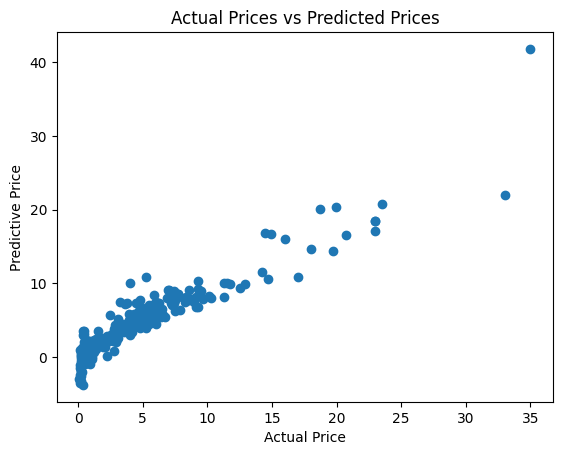

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predictive Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

#tells us how close the values. once the price value increase, there are some outliers.
# the values predicted by our ML model is very close to the original values.

In [19]:
#Prediction on Test Data
test_data_prediction = lin_reg_model.predict(X_test)

In [20]:
# R Squared Error

error_score_test = metrics.r2_score(Y_Test,test_data_prediction) #compare the origin with model prediction values
print('R Squared Error: ',error_score_test) #the error score should be as low as possible

R Squared Error:  0.8365766715027051


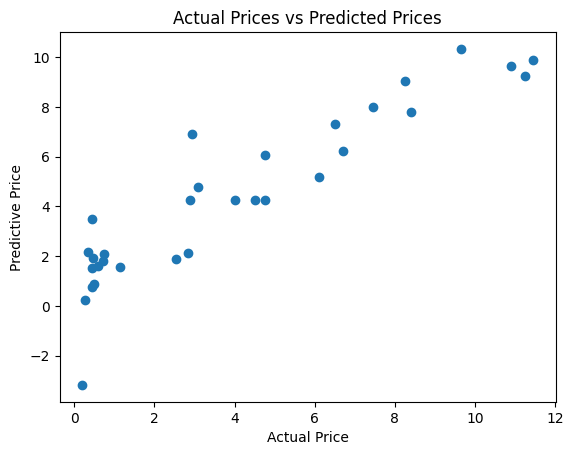

In [21]:
plt.scatter(Y_Test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predictive Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [22]:
# Lasso regression performs better in most of the cases
# Linear regression goes well with correlated variables



Lasso Regression

In [23]:
#loading the lasso regression model
lass_reg_model = Lasso()

In [24]:
lass_reg_model.fit(X_train, Y_train)


Lasso()

Model Evaluation

In [25]:
#prediction on Training data
lasso_training_data_prediction = lass_reg_model.predict(X_train)

In [26]:
# R sqaured Error
lasso_error_score = metrics.r2_score(Y_train,lasso_training_data_prediction)
print('Lasso R Squared Eroor :', lasso_error_score)

Lasso R Squared Eroor : 0.8427856123435794


Visualize the Actual prices and Predicted prices

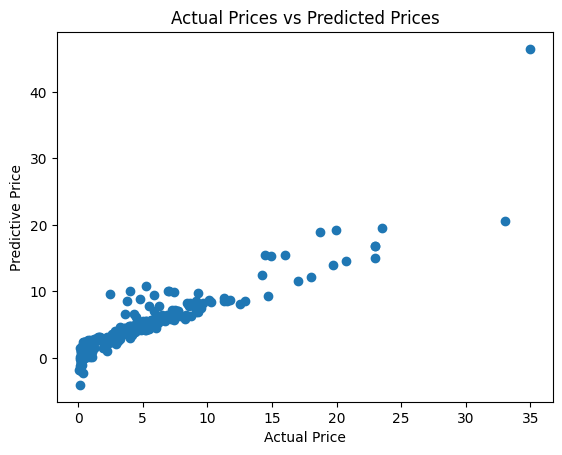

In [29]:
plt.scatter(Y_train, lasso_training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predictive Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

#points are much closer to each other compared to linear regression

In [30]:
#Prediction on Test Data
lasso_test_data_prediction = lass_reg_model.predict(X_test)

In [31]:
# R sqaured Error
lasso_test_error_score = metrics.r2_score(Y_Test,lasso_test_data_prediction)
print('Lasso R Squared Eroor :', lasso_test_error_score)

Lasso R Squared Eroor : 0.8709167941173195


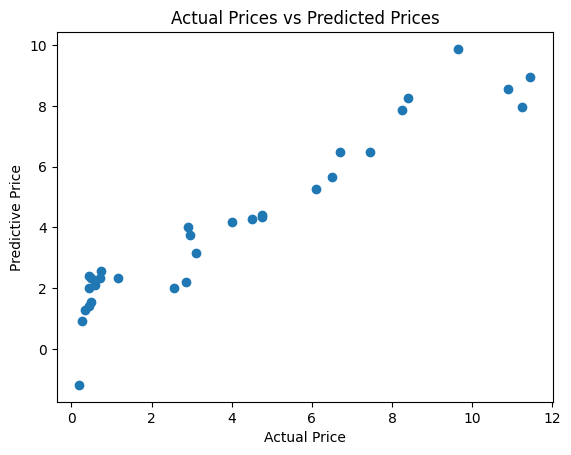

In [33]:
plt.scatter(Y_Test, lasso_test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predictive Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

#distance is not too much which makes it a pretty good model